#### Chapter 3: Integer Factorization and RSA

In [46]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

#### 3.3

(a) $\phi(6)=2$ do $gcd(1,6)=gcd(5,6)=1$

$\phi(9)=6$ do $gcd(1,9)=gcd(2,9)=gcd(4,9)=gcd(5,9)=gcd(7,9)=gcd(8,9)=1$

$\phi(15)=8$ do $gcd(1,15)=gcd(2,15)=gcd(4,15)=gcd(7,15)=gcd(8,15)=gcd(11,15)=gcd(13,15)=gcd(14,15)=1$

$\phi(17)=16$ do $17$ là số nguyên tố nên mọi số trong khoảng $[1,16]$ đều nguyên tố cùng nhau với $17$

(b) Nếu $p$ là số nguyên tố $\rightarrow$ tất cả các số trong khoảng $[1,p-1]$ đều nguyên tố cùng nhau với $p\rightarrow \phi(p)=p-1$

(c) Gọi $L=\{ i \in \mathbb{Z_n}$ $:$ $gcd(i,n)=1 \} \rightarrow |L|=\phi(n)$

Ta lấy từng phần tử trong tập $L$ và nhân cho một con số $a$ bất kì thuộc $\mathbb{Z}_n$ thoả $gcd(a,n)=1$ thì $L'=\{ ia$ $:$ $gcd(i,n)=1 \}$
- Do $gcd(a,n)=1$ và $gcd(i,n)=1$ nên $gcd(ai,n)=1$ $\rightarrow ai \in L$ $\rightarrow L'$ là 1 hoán vị của $L \rightarrow |L'|=\phi(n)$

Lấy mọi phần tử trong $L'$ nhân với nhau ta có $\prod_{i=1\&gcd(i,n)=1}^{n}(i*a)=\prod_{i=1\&gcd(i,n)=1}^{n}(i)$ $(mod$ $n)$ $\Rightarrow a^{\phi(n)}=1$ $(mod$ $n)$ 

#### 3.5

(a) Tính $d$ thoả $d=e^{-1}$ $(mod$ $\phi(n))$ (có thể tính được do $gcd(e, \phi(n)) = 1$) $\rightarrow ed=1$ $(mod$ $n)$

$x^e=c$ $(mod$ $n)$ $\rightarrow x^{ed}=c^d$ $(mod$ $n)$

Do $gcd(n,c)=1$ $\rightarrow gcd(n,x)=1$ $\rightarrow x^{\phi(n)}=1$ $(mod$ $n)$ $\rightarrow x^{ed\text{ }\%\text{ }\phi(n)}=x=c^d$ $(mod$ $n)$

In [47]:
def solve35(e, c, n):
    factor = []
    pi = 2
    tmp = n
    while tmp != 1:
        while tmp % pi == 0:
            if pi not in factor: factor.append(pi)
            tmp //= pi
        pi += 1
    
    phi_n = n
    for x in factor:
        phi_n = phi_n // x * (x - 1)
    
    d = pow(e, -1, phi_n)
    return pow(c, d, n)

print("(i). x =", solve35(577, 60, 1463))
print("(ii). x =", solve35(959, 1583, 1625))
print("(iii). x =", solve35(133957, 224689, 2134440))

(i). x = 1390
(ii). x = 147
(iii). x = 1892929


#### 3.8

In [48]:
def solve_factor(a, b):
    sum_prime = a - b + 1 # p + q = pq + 1 - (p - 1)(q - 1) = a + 1 - b
    delta = sum_prime * sum_prime - 4 * a
    p = (sum_prime + int(math.sqrt(delta))) // 2
    q = (sum_prime - int(math.sqrt(delta))) // 2
    return p, q

print("(a).", solve_factor(352717, 351520))
print("(b).", solve_factor(77083921, 77066212))
print("(c).", solve_factor(109404161, 109380612))
print("(d).", solve_factor(172205490419, 172204660344))

(a). (677, 521)
(b). (10007, 7703)
(c). (17183, 6367)
(d). (422183, 407893)


#### 3.12

Do $gcd(e_1,e_2)=gcd(1021763679,519424709)=1 \rightarrow$ có thể tìm lại được tin nhắn $m$

Xét phương trình $e_1*u+e_2*v=gcd(e_1,e_2) \rightarrow 1021763679*u+519424709*v=1$

Sử dụng định lý **Bezout** ta giải ra được $u=252426389$ và $v=-496549570$

Vậy xét đẳng thức $c_1^u*c_2^v=m^{e_1*u+e_2*v}=m$ $(mod$ $n)$ $\Rightarrow m=1244183534^{252426389}*(732959706^{496549570})^{-1}$ $(mod$ $1889570071)=1054592380$

#### 3.14

In [49]:
def miller_rabin_test(a, n):
    if n % 2 == 0 or math.gcd(a, n) > 1: return 0

    q = n - 1
    k = 0
    while q % 2 == 0:
        k += 1
        q //= 2
    
    a = pow(a, q, n)
    if a == 1: return 1
    for i in range(k):
        if a == n - 1: return 1
        a = (a * a) % n
    return 0

n = 1105
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(a).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(a).", n, "is probably prime. Witness =", tmp)

n = 294409
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(b) + (c).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(b) + (c).", n, "is probably prime. Witness =", tmp)

n = 118901509
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(d).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(d).", n, "is probably prime. Witness =", tmp)

n = 118901521
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(e).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(e).", n, "is probably prime. Witness =", tmp)

n = 118901527
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(f).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(f).", n, "is probably prime. Witness =", tmp)

n = 118915387
ok = 0
tmp = []
for i in range(10):
    a = random.randint(2, n - 1)
    tmp.append(a)
    if miller_rabin_test(a, n) == 0:
        print("(g).", n, "is composite. Witness =", a)
        ok = 1
        break
if ok == 0: print("(g).", n, "is probably prime. Witness =", tmp)

(a). 1105 is composite. Witness = 97
(b) + (c). 294409 is composite. Witness = 192740
(d). 118901509 is probably prime. Witness = [104298968, 6724074, 30373268, 55587264, 33042464, 102805607, 58800684, 78266775, 23567334, 86161545]
(e). 118901521 is composite. Witness = 32583734
(f). 118901527 is probably prime. Witness = [101343031, 17634817, 83165383, 49475133, 45600084, 21917649, 30647973, 106658181, 20238324, 47061717]
(g). 118915387 is composite. Witness = 56539066


#### 3.16

r(20) = 8
r(30) = 10
r(100) = 25; ratio(100) = 1.151292546497023
r(1000) = 168; ratio(1000) = 1.1605028868689988
r(10000) = 1229; ratio(10000) = 1.131950831715873
r(100000) = 9592; ratio(100000) = 1.1043198105999443


Text(0, 0.5, 'Ratio')

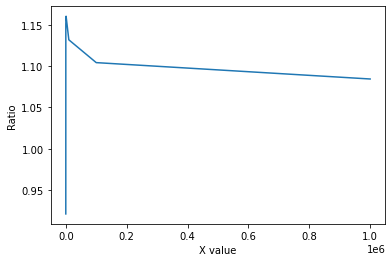

In [50]:
def count_prime(n):
    cnt = 0
    for i in range(2, n + 1):
        ok = 1
        for j in range(10):
            if i - 1 < 2:
                break
            a = random.randint(2, i - 1)
            if miller_rabin_test(a, i) == 0:
                ok = 0
                break
        if ok == 1 or i == 2:
            cnt += 1
    return cnt

print("r(20) =", count_prime(20))
print("r(30) =", count_prime(30))
print("r(100) =", str(count_prime(100)) + str(";"), "ratio(100) =", count_prime(100) / (100 / math.log(100)))
print("r(1000) =", str(count_prime(1000)) + str(";"), "ratio(1000) =", count_prime(1000) / (1000 / math.log(1000)))
print("r(10000) =", str(count_prime(10000)) + str(";"), "ratio(10000) =", count_prime(10000) / (10000 / math.log(10000)))
print("r(100000) =", str(count_prime(100000)) + str(";"), "ratio(100000) =", count_prime(100000) / (100000 / math.log(100000)))

x = []
y = []
for i in range(1, 7):
    x.append(pow(10, i))
    y.append(count_prime(pow(10, i)) / (pow(10, i) / math.log(pow(10, i))))
plt.plot(np.array(x), np.array(y))
plt.xlabel("X value")
plt.ylabel("Ratio")